#Clustering Menggunakan Algoritma K-Means (dengan Parameter Default)

Dataset: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction

Setelah ditentukan fitur-fitur yang akan digunakan sesuai dengan hasil visualisasi di Colab0: https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?ouid=106950143032811372632&usp=drive_link

Maka, dibuatlah clustering dengan menggunakan algoritma K-Means yang bertujuan untuk memahami karakter customer pada e-commerce XYZ.

Parameter algoritma yang digunakan yaitu hyperparameter tuning (berdasarkan rangkuman parameter https://docs.google.com/spreadsheets/d/1SwdHlndnVU8mGfc1X6n9RxK3bcWqKYSO6sVfMsIndkU/edit?usp=sharing ) yaitu Skema 10.


Fitur yang dipakai adalah 3 fitur yang paling berkolerasi satu sama lain yaitu:

1. OrderCount
2. CouponUsed
3. HourSpendOnApp


#1. Import Library

Pada tahap ini, kami melakukan impor library atau modul yang dibutuhkan dalam proses pembangunan model clustering. Library ini mencakup NumPy dan Pandas untuk manipulasi data, Scikit-Learn untuk pembangunan model, dan matplotlib atau seaborn untuk visualisasi data.

In [ ]:
# Impor pustaka yang diperlukan untuk operasi numerik
import numpy as np  # Import numpy untuk operasi numerik seperti manipulasi array


# Impor pustaka yang diperlukan untuk pemrosesan data dan pembangunan model
# Import pandas untuk manipulasi dan analisis data
import pandas as pd

# Import train_test_split dari scikit-learn untuk memisahkan data
from sklearn.model_selection import train_test_split

# Import StandardScaler dari scikit-learn untuk standarisasi data, encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Import PCA dari scikit-learn untuk dimensionality reduction
from sklearn.decomposition import PCA

# Import K-Means dari scikit-learn untuk model K-Means
from sklearn.cluster import KMeans

# Import SVC dari scikit-learn untuk model Support Vector Machine (SVM)
from sklearn.svm import SVC

# Import GridSearchCV dari scikit-learn untuk membantu hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Import metrik evaluasi dari scikit-learn untuk mengukur performa model
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay, confusion_matrix


# Impor pustaka untuk visualisasi data
# Import matplotlib.pyplot untuk membuat plot
import matplotlib.pyplot as plt

# Import seaborn untuk plot visualisasi data yang lebih menarik
import seaborn as sns

# Import plotly.express untuk membuat histogram
import plotly.express as px

# Import plot_confusion_matrix dari mlxtend untuk membuat plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix


# Import pustaka untuk deployment
import pickle # Import pickle untuk menyimpan model dalam format file pickle


#2. Menampilkan Dataset
Pada tahap ini, kami menampilkan dataset yang akan digunakan untuk pembangunan model klasifikasi. Data bersumber dari Kaggle yang diunggah oleh Ankit Verma pada tahun 2020 dengan link download [di sini.](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/download?datasetVersionNumber=1)


In [ ]:
# URL raw dari file excel di GitHub
url = "https://github.com/ranidsr/projekmsib/raw/main/E%20Commerce%20Dataset.xlsx"

# Membaca data sheet E Comm dari URL raw
df = pd.read_excel(url, sheet_name='E Comm')

# Menampilkan sampel dataset
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


#Seleksi Fitur

Pada tahap ini, kami melakukan seleksi fitur untuk memilih fitur-fitur yang paling berkorelasi antara satu sama lain dalam clustering pelanggan e-commerce. Pemilihan fitur ini menggunakan metode korelasi untuk menilai korelasi antara setiap fitur dan memilih fitur-fitur yang saling memiliki korelasi tinggi.

Sebelumnya pada [Colab0](https://colab.research.google.com/drive/12xwqqv7F0ZF7hytN2U5kmlGr0_lHeOhG?usp=drive_link), kami memilih 3 fitur yang paling berkorelasi positif antara satu sama lain adalah:
1. OrderCount
2. CouponUsed
3. HourSpendOnApp


Berikut kesimpulan dari metode korelasi menggunakan Pearson yang menunjukkan hasil tersebut.
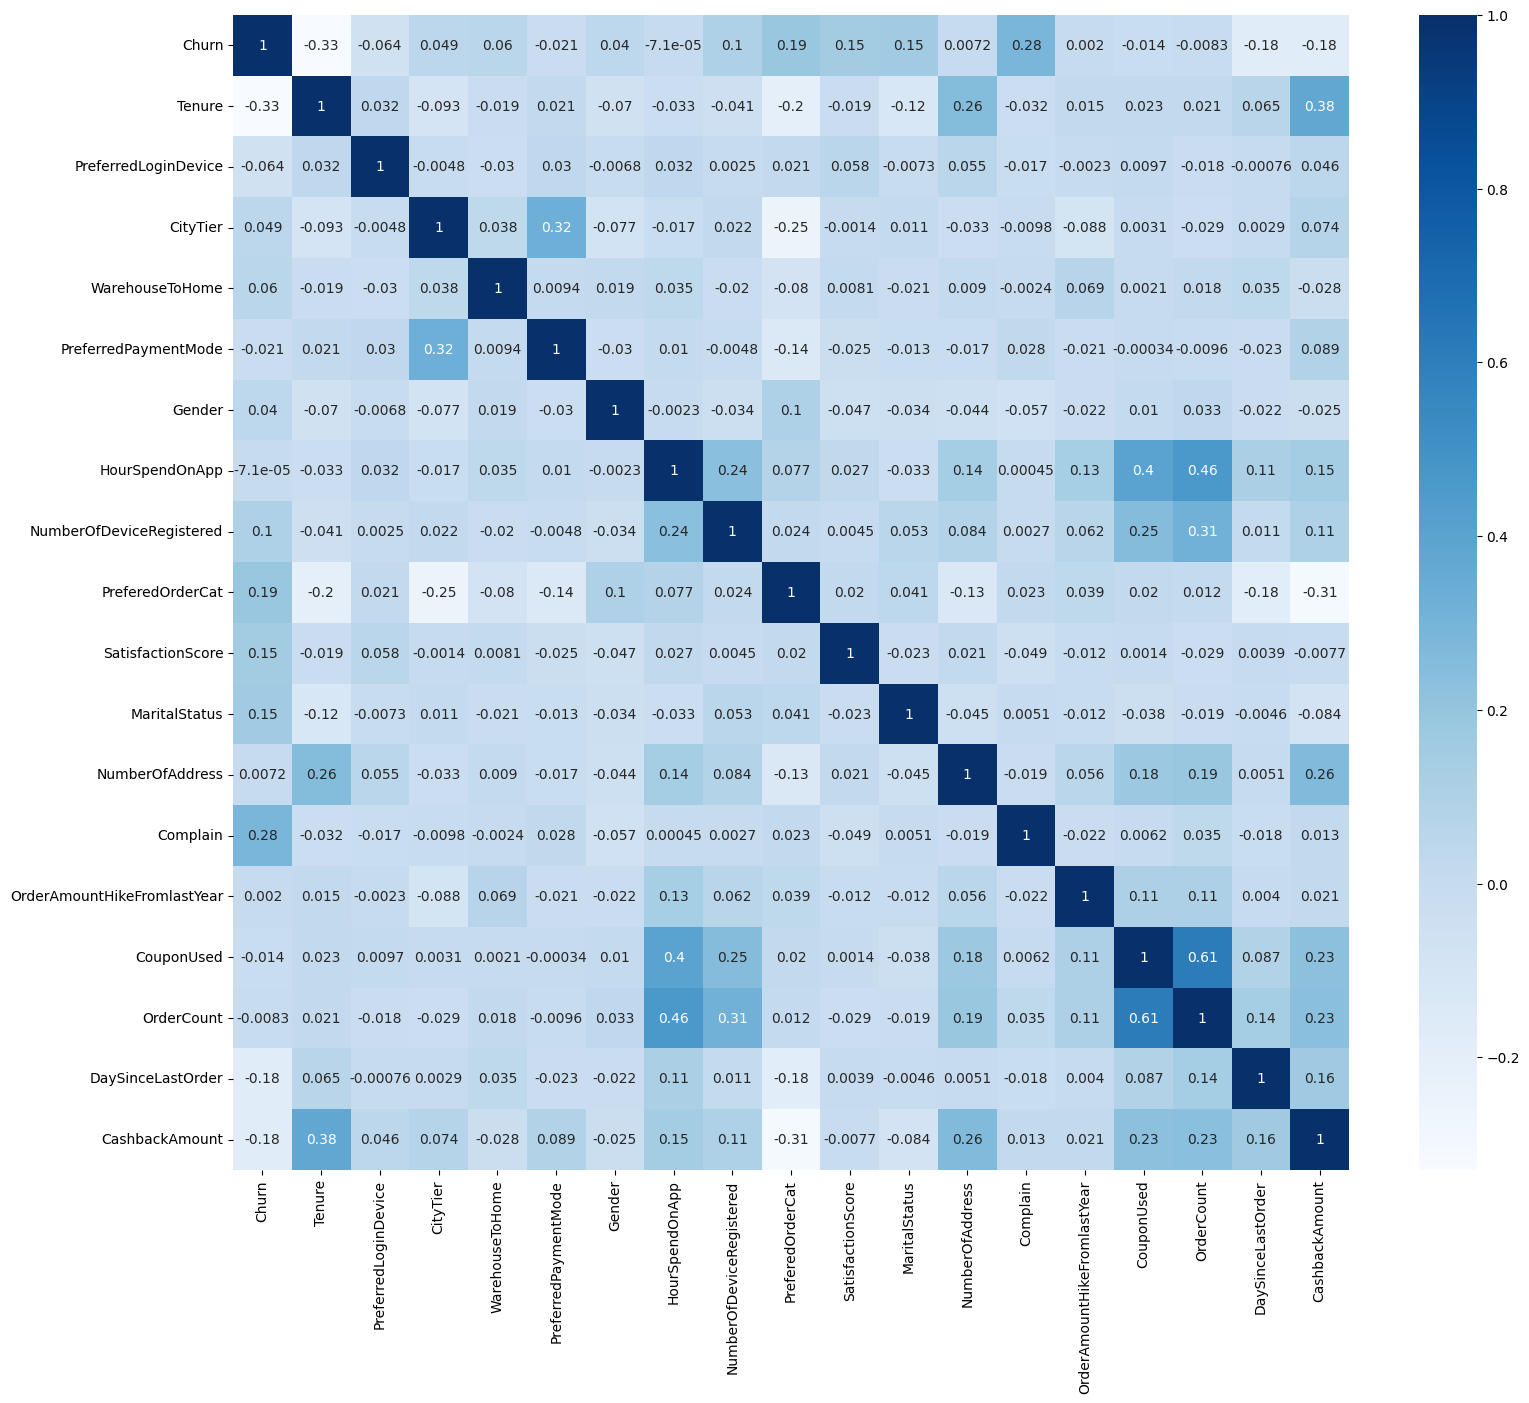

In [ ]:
# Menampilkan DataFrame dengan kolom-kolom yang terpilih
df=df[['OrderCount', 'CouponUsed', 'HourSpendOnApp']]

# Cetak DataFrame yang telah difilter
df

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,1.0,NaN
...,...,...,...
5625,2.0,1.0,3.0
5626,2.0,1.0,3.0
5627,2.0,1.0,3.0
5628,2.0,2.0,4.0


In [ ]:
# Menampilkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      5372 non-null   float64
 1   CouponUsed      5374 non-null   float64
 2   HourSpendOnApp  5375 non-null   float64
dtypes: float64(3)
memory usage: 132.1 KB


##Menangani Nilai Hilang

Agar tidak mempengaruhi performa model, baris data yang memiliki nilai yang hilang akan kami hapus.

In [ ]:
# Menghapus baris data yang memiliki nilai yang hilang
df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)
df.reset_index()
df = pd.concat([df], ignore_index=True)

<ipython-input-5-958426be285e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, how='any', subset=(['OrderCount', 'CouponUsed', 'HourSpendOnApp']), inplace=True)


In [ ]:
# Menampilkan informasi mengenai dataset setelah penghapusan nilai hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4861 non-null   float64
 1   CouponUsed      4861 non-null   float64
 2   HourSpendOnApp  4861 non-null   float64
dtypes: float64(3)
memory usage: 114.1 KB


#3. Exploratory Data Analysis

Dalam tahap ini, kami melakukan Exploratory Data Analysis (EDA) pada dataset untuk memahami lebih dalam tentang dataset yang dimiliki.

In [ ]:
# Melihat persebaran nilai pada kolom tipe data selain objek (Churn, Complain, SatisfactionScore, NumberOfDeviceRegistered)
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

OrderCount : [ 1.  6.  2. 15.  4.  7.  3. 11.  9.  5. 12. 10.  8. 13. 14. 16.]
2.0     1925
1.0     1507
3.0      352
7.0      187
4.0      171
5.0      165
8.0      160
6.0      125
9.0       56
12.0      44
11.0      43
10.0      34
13.0      27
14.0      24
16.0      21
15.0      20
Name: OrderCount, dtype: int64
________________________________________________________________________________
CouponUsed : [ 1.  0.  4.  2.  9.  6. 11.  7. 12. 10.  5.  3. 13.  8. 14. 16.]
1.0     1929
2.0     1210
0.0      875
3.0      285
4.0      176
5.0      115
6.0       99
7.0       79
8.0       40
9.0       13
10.0      12
11.0       8
12.0       8
13.0       6
14.0       4
16.0       2
Name: CouponUsed, dtype: int64
________________________________________________________________________________
HourSpendOnApp : [3. 2. 1. 0. 4. 5.]
3.0    2450
2.0    1300
4.0    1079
1.0      27
5.0       3
0.0       2
Name: HourSpendOnApp, dtype: int64
__________________________________________________________

## Menampilkan Statistik Deskriptif

Kami menampilkan statistik deskritif dari fitur yang telah terpilih. Statistik deskriptif ini memberikan gambaran mengenai distribusi nilai-nilai dalam fitur tersebut.


Statistik deskriptif umumnya mencakup informasi seperti rata-rata (mean), deviasi standar (std), nilai minimum (min), nilai maksimum (max), quartil pertama (25% atau Q1), quartil kedua (50% atau Q2), dan quartil ketiga (75% atau Q3).


In [ ]:
# Menggunakan metode .describe() untuk statstik deskriptif
statdesc = df.describe()

# Cetak statistik deskriptif
statdesc

,OrderCount,CouponUsed,HourSpendOnApp
count,4861.000000,4861.000000,4861.000000
mean,2.968319,1.756223,2.943427
std,2.830141,1.854265,0.717426
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,2.000000
50%,2.000000,1.000000,3.000000
75%,3.000000,2.000000,3.000000
max,16.000000,16.000000,5.000000


##Mengatasi Outlier

Outlier atau data pencilan merupakan data-data yang bernilai terlampu terlalu besar maupun terlalu kecil dibandingkan kelompok data lainnya dalam satu kolom.

Outlier dapat menunjukkan keberagaman dalam pengukuran, error, maupun kebaruan. Namun, agar model yang akan digunakan tidak dipengaruhi oleh outlier, maka kami memutuskan untuk menghapus data pencilan.

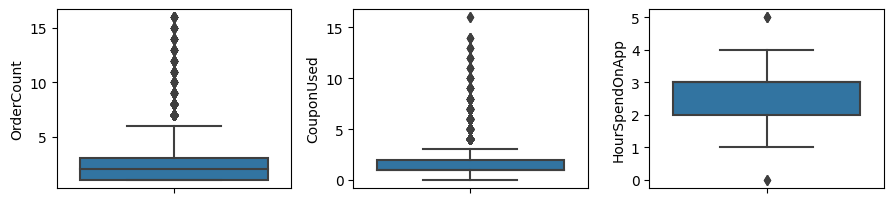

In [ ]:
# Visualisasi data menggunakan BoxPlot untuk melihat outlier
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [ ]:
# Membuat fungsi untuk menentukan data tersebut adalah outlier menggunakan perhitungan IQR (Inter-Quartile Range)
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

# Menetapkan batas bawah dan atas
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

# Menghapus baris data yang memiliki outlier dengan metode trimming outliers
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

df.columns

Index(['OrderCount', 'CouponUsed', 'HourSpendOnApp'], dtype='object')

In [ ]:
# Mengaplikasikan fungsi terhadap data yang memiliki outlier
cols_outliers = ['OrderCount', 'CouponUsed', 'HourSpendOnApp']
for col in cols_outliers:
    df = handle_outliers(df , col)

# Cetak 5 data teratas
df.head()

,OrderCount,CouponUsed,HourSpendOnApp
0,1.0,1.0,3.0
1,1.0,0.0,3.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
5,1.0,0.0,2.0


In [ ]:
# Melihat rangkuman data setelah trimming outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 0 to 4860
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4013 non-null   float64
 1   CouponUsed      4013 non-null   float64
 2   HourSpendOnApp  4013 non-null   float64
dtypes: float64(3)
memory usage: 125.4 KB


In [ ]:
# Me-reset penomoran index sesuai jumlah baris data

df.reset_index()
df = pd.concat([df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OrderCount      4013 non-null   float64
 1   CouponUsed      4013 non-null   float64
 2   HourSpendOnApp  4013 non-null   float64
dtypes: float64(3)
memory usage: 94.2 KB


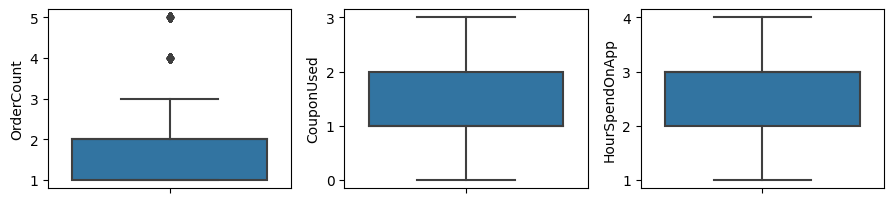

In [ ]:
# Visualisasi data setelah proses penghapusan data outlier menggunakan BoxPlot

fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

## Menampilkan korelasi antar kolom

Pada tahap ini, kita akan melihat seberapa kuat hubungan antara setiap kolom fitur. Korelasi ini dapat memberikan wawasan tentang pengelompokkan pelanggan.

<Axes: >

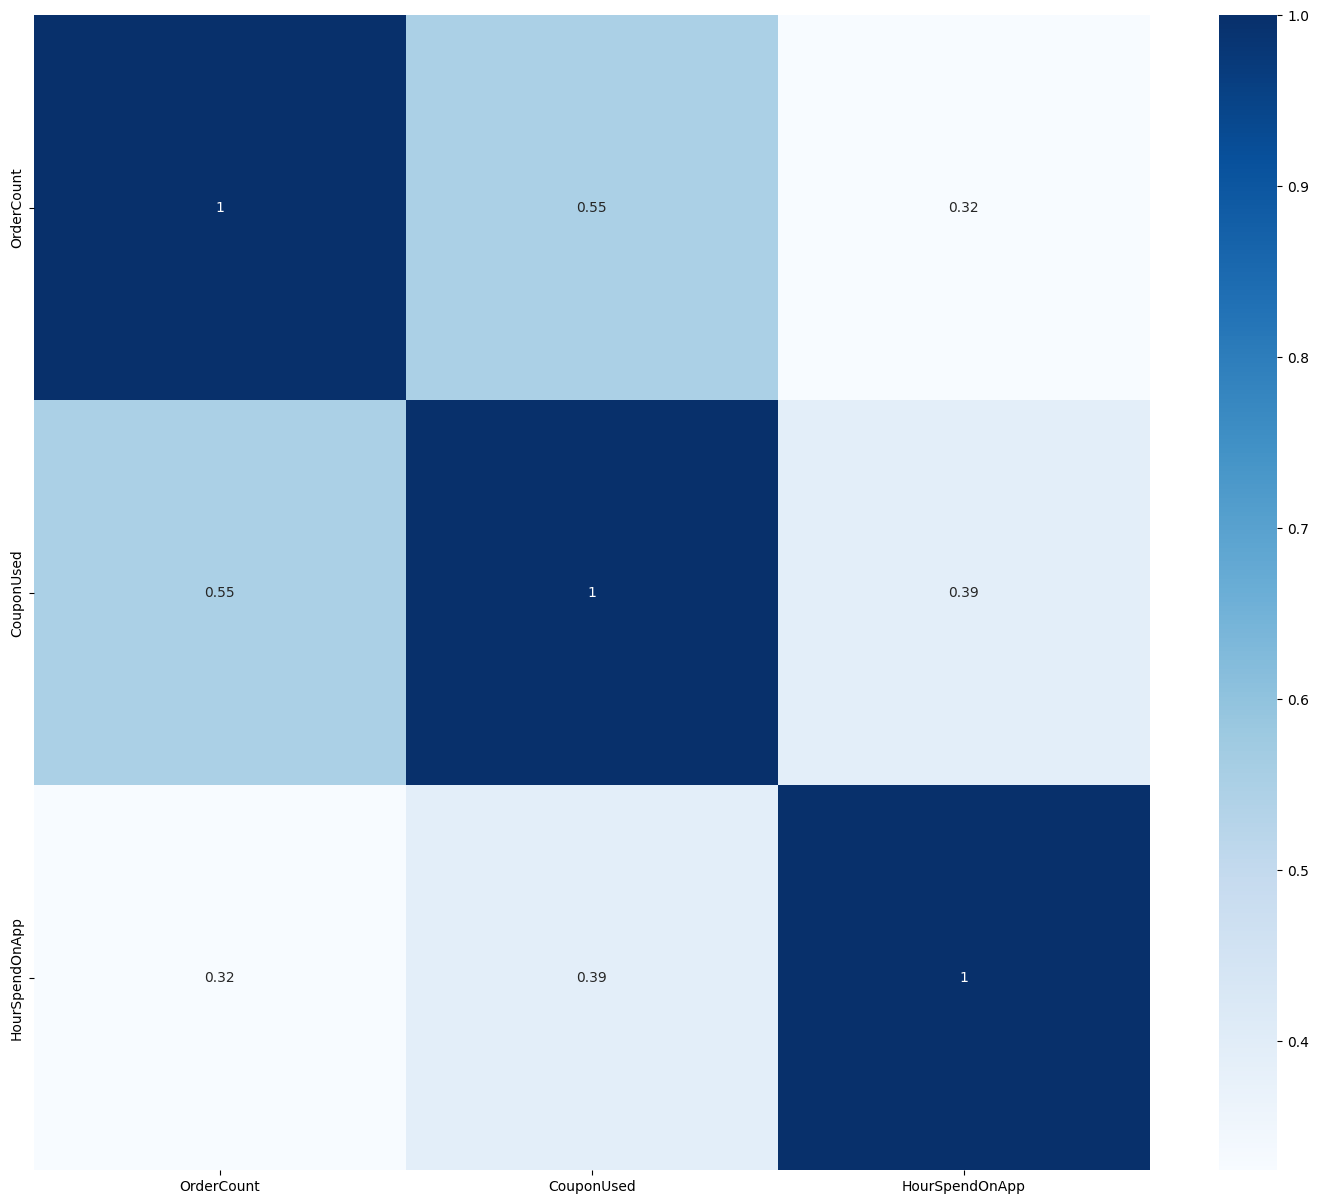

In [ ]:
#Visualisasi data hasil korelasi menggunakan seaborn heatmap
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

#4. Data Transformation

Pada tahap ini, kami melakukan transformasi data dengan menggunakan teknik standardisasi atau scaling. Standardisasi adalah proses untuk mengubah data agar memiliki mean (rerata) sekitar 0 dan deviasi standar (standard deviation) sekitar 1. Hal ini dilakukan agar semua fitur dalam dataset memiliki skala yang serupa.

In [ ]:
# Standarisasi Data
scaler = StandardScaler()
X = scaler.fit_transform(df)
X

array([[-0.95316311, -0.20386864,  0.0950724 ],
       [-0.95316311, -1.43784278,  0.0950724 ],
       [-0.95316311, -1.43784278, -1.31277091],
       ...,
       [ 0.16233516, -0.20386864,  0.0950724 ],
       [ 0.16233516,  1.0301055 ,  1.50291571],
       [ 0.16233516,  1.0301055 ,  0.0950724 ]])

## Dimensionality Reduction

Dimensionality Reduction digunakan untuk mengambil informasi terpenting yang ada pada data yang bertujuan untuk mengecilkan dimensi data agar proses permodelan berjalan efisien dan tidak memakan waktu yang lama. Namun, tanpa mengurangi informasi yang ada.

Metode Dimensionality Reduction yang digunakan adalah metode PCA adalah teknik unsupervised (tidak diawasi) sehingga tidak membutuhkan data label. Metode ini sangat cocok untuk dimensionality reduction pada permodelan unsupervised learning.

In [ ]:
# Membuat objek PCA
pca=PCA(n_components=2)

In [ ]:
# Melakukan Metode PCA pada data
fit_pca = pca.fit_transform(X)

In [ ]:
# Pembuatan DataFrame baru setelah metode PCA
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

,PCA_1,PCA_2
4008,0.018971,-0.054923
4009,0.018971,-0.054923
4010,0.018971,-0.054923
4011,1.503933,-0.941001
4012,0.783474,0.251614


In [ ]:
# Menggabungkan penomoran index pada DataFrame baru
finalDf = pd.concat([pca_df], axis = 1)
finalDf.head(5)

,PCA_1,PCA_2
0,-0.644989,-0.578940
1,-1.409491,-0.885477
2,-2.129950,0.307138
3,-2.129950,0.307138
4,-2.129950,0.307138


In [ ]:
# Melihat apakah ada nilai yang hilang
finalDf.isnull().sum()

PCA_1    0
PCA_2    0
dtype: int64

In [ ]:
# Melihat informasi nilai DataFrame baru
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PCA_1   4013 non-null   float64
 1   PCA_2   4013 non-null   float64
dtypes: float64(2)
memory usage: 62.8 KB


#5. Modeling & Evaluation

Pada tahap ini, kami membangun model machine learning untuk melakukan clustering terhadap data pelanggan. Kami akan menggunakan algoritma K-Means untuk melatih model dengan pengujian dengan berbagai parameter yang berbeda dalam proses hyperparameter tuning untuk mencari kombinasi parameter yang memberikan hasil terbaik. Evaluasi kinerja model dilakukan menggunakan Silhouette Coefficient Score (SC). Model terbaik kemudian akan digunakan untuk melakukan clustering.

#Skema 10 (Hyperparameter Tuning)



*   n_clusters = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
*   init = {'random', 'k-means++'}
*   n_init = {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}



In [ ]:
# Inisialisasi model K-Means
#clustering = KMeans()

# Hyperparameter yang akan diuji untuk K-Means
#param_grid = {'n_clusters': [1, 2, 3, 4, 5, 6, 7, 8, 9],
              #'init':('random', 'k-means++'),
              #'n_init':[1, 2, 3, 4, 5, 6, 7, 8, 9]}

# Pengambilan sampel random dari DataFrame untuk pengaplikasian Grid Search
#X = np.random.randn(4013, 2)
#y = np.random.randint(0, 3, size=X.shape[0])

# Membuat Grid Search untuk K-Means
#grid = GridSearchCV(
    #clustering, param_grid=param_grid, cv=5, scoring="rand_score",
    #error_score="raise"
#)

# Melakukan pelatihan dengan Grid Search pada data sampel
#grid.fit(X, y)
#grid.best_params_

#Modeling Best Parameter (Skema 10)


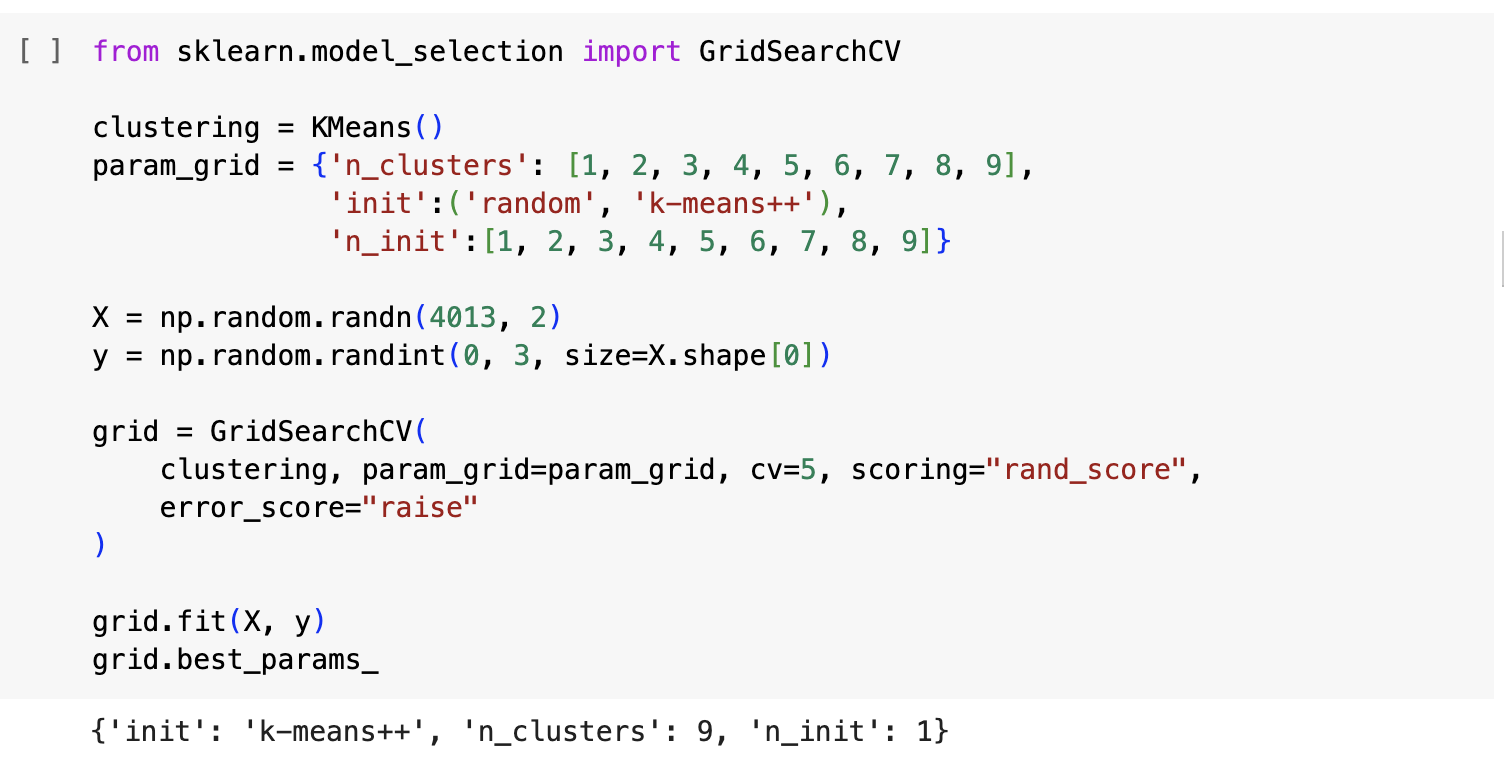
*   n_clusters = 9
*   init = k-means++
*   n_init = 1



In [ ]:
# Menggunakan hyperparameter terbaik untuk KMeans
skema10_kmeans = KMeans(n_clusters=9, init='k-means++', n_init=1)

# Melakukan clustering
skema10_kmeans.fit(finalDf)

KMeans(n_clusters=9, n_init=1)

In [ ]:
# Melihat hasil clustering Skema 10
labels_skema10_kmeans = skema10_kmeans.labels_
labels_skema10_kmeans

array([3, 3, 7, ..., 5, 2, 1], dtype=int32)

In [ ]:
# Mencetak centroid
print(skema10_kmeans.cluster_centers_)

[[-1.28142349  0.7529381 ]
 [ 0.76705123  0.48063512]
 [ 1.56256478 -0.87310327]
 [-0.99808664 -0.71519412]
 [ 2.6672868   1.01758757]
 [ 0.01744227 -0.05161567]
 [ 0.73943063 -1.24753825]
 [-2.14204409  0.32715743]
 [ 1.50048717  2.54841543]]


In [ ]:
# Menampilkan hasil evaluasi Silhouette Coefficient Score
SC_skema10_kmeans = silhouette_score(finalDf, labels_skema10_kmeans, metric='euclidean')
print('Silhouette Score model K-means Skema 10 = ', SC_skema10_kmeans)

Silhouette Score model K-means Skema 10 =  0.742190649424171


In [ ]:
#Menggabungkan kolom dimensional reduction hasil clustering k-means dengan kolom data sebelumnya untuk divisualisasikan
df_pca_kmeans = pd.concat([pca_df.reset_index(drop=True), pd.DataFrame(df)], axis = 1)
df_pca_kmeans.columns.values[0:]
df_pca_kmeans['Clustering K-means PCA'] = skema10_kmeans.labels_
df_pca_kmeans.head()

,PCA_1,PCA_2,OrderCount,CouponUsed,HourSpendOnApp,Clustering K-means PCA
0,-0.644989,-0.578940,1.0,1.0,3.0,3
1,-1.409491,-0.885477,1.0,0.0,3.0,3
2,-2.129950,0.307138,1.0,0.0,2.0,7
3,-2.129950,0.307138,1.0,0.0,2.0,7
4,-2.129950,0.307138,1.0,0.0,2.0,7


In [ ]:
# Melihat informasi DataFrame setelah penggabungan
df_pca_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCA_1                   4013 non-null   float64
 1   PCA_2                   4013 non-null   float64
 2   OrderCount              4013 non-null   float64
 3   CouponUsed              4013 non-null   float64
 4   HourSpendOnApp          4013 non-null   float64
 5   Clustering K-means PCA  4013 non-null   int32  
dtypes: float64(5), int32(1)
memory usage: 172.6 KB


In [ ]:
# Pembuatan mapping hasil cluster
df_pca_kmeans['Cluster'] = df_pca_kmeans['Clustering K-means PCA'].map({0:'cluster ke-0', 1:'cluster ke-1', 2:'cluster ke-2', 3:'cluster ke-3', 4:'cluster ke-4', 5:'cluster ke-5', 6:'cluster ke-6', 7:'cluster ke-7', 8:'cluster ke-8'})

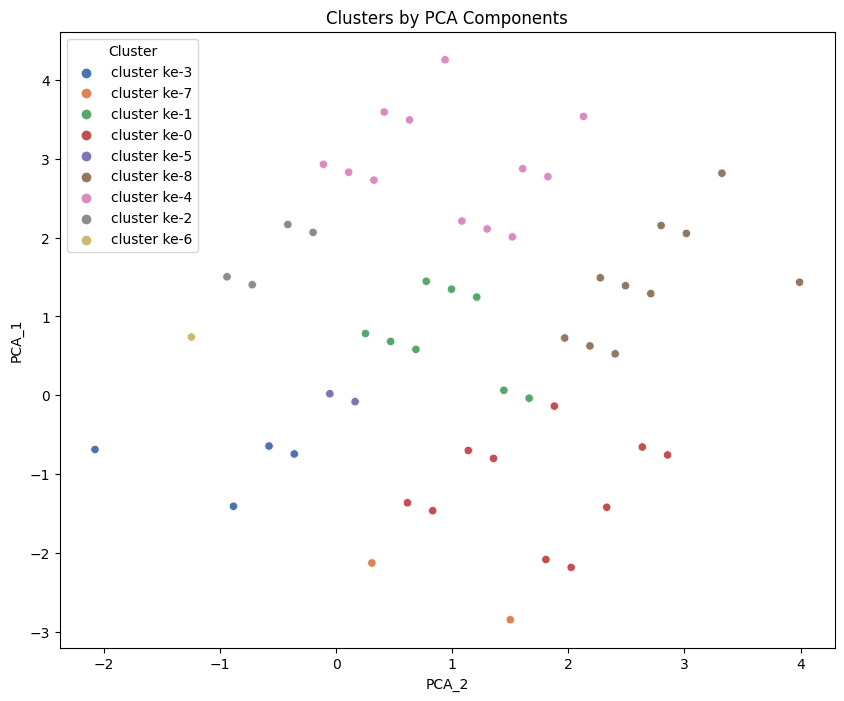

In [ ]:
# Visualisasi cluster dengan seaborn
x_axis = df_pca_kmeans['PCA_2']
y_axis = df_pca_kmeans['PCA_1']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=df_pca_kmeans, x=x_axis, y=y_axis, hue=df_pca_kmeans['Cluster'], palette ='deep')
plt.title('Clusters by PCA Components')
plt.show()

In [ ]:
# Pembuatan DataFrame baru tanpa kolom PCA
df['Hasil_Clustering'] = labels_skema10_kmeans
df

,OrderCount,CouponUsed,HourSpendOnApp,Hasil_Clustering
0,1.0,1.0,3.0,3
1,1.0,0.0,3.0,3
2,1.0,0.0,2.0,7
3,1.0,0.0,2.0,7
4,1.0,0.0,2.0,7
...,...,...,...,...
4008,2.0,1.0,3.0,5
4009,2.0,1.0,3.0,5
4010,2.0,1.0,3.0,5
4011,2.0,2.0,4.0,2


#6. Penarikan Kesimpulan

Dari hasil clustering, dibuat penjelasan pada masing-masing cluster seperti apa karakteristik pelanggan yang termasuk di dalam cluster tersebut. Hal ini ditujukan untuk membantu industri e-commerce untuk memahami sikap pelanggan mereka.

In [ ]:
for i in range(9):
  print(f'Cluster ke-{i}')
  print('Rata-rata jumlah transaksi :', df[df['Hasil_Clustering']==i]['OrderCount'].mean())
  print('Rata-rata jumlah kupon yang digunakan  :', df[df['Hasil_Clustering']==i]['CouponUsed'].mean())
  print('Rata-rata waktu penggunaan app dalam jam :', df[df['Hasil_Clustering']==i]['HourSpendOnApp'].mean())
  print()

Cluster ke-0
Rata-rata jumlah transaksi : 2.4277777777777776
Rata-rata jumlah kupon yang digunakan  : 1.288888888888889
Rata-rata waktu penggunaan app dalam jam : 1.9777777777777779

Cluster ke-1
Rata-rata jumlah transaksi : 1.0289855072463767
Rata-rata jumlah kupon yang digunakan  : 0.5115942028985507
Rata-rata waktu penggunaan app dalam jam : 3.0014492753623188

Cluster ke-2
Rata-rata jumlah transaksi : 2.0986093552465235
Rata-rata jumlah kupon yang digunakan  : 1.5309734513274336
Rata-rata waktu penggunaan app dalam jam : 4.0

Cluster ke-3
Rata-rata jumlah transaksi : 1.0
Rata-rata jumlah kupon yang digunakan  : 0.0
Rata-rata waktu penggunaan app dalam jam : 1.9832134292565948

Cluster ke-4
Rata-rata jumlah transaksi : 2.1342756183745584
Rata-rata jumlah kupon yang digunakan  : 1.8657243816254416
Rata-rata waktu penggunaan app dalam jam : 3.0

Cluster ke-5
Rata-rata jumlah transaksi : 3.4482758620689653
Rata-rata jumlah kupon yang digunakan  : 1.5517241379310345
Rata-rata waktu peng

Bisa kita simpulkan bahwa :

- Cluster ke-0 adalah kelompok customer yang paling sedikit bertransaksi. Walaupun telah menghabiskan cukup banyak waktu browsing di aplikasi, kupon yang digunakan juga sangat sedikit. (customer yang sangat pemilih dan sering membandingkan kualitas dan harga. Termasuk hanya bertransaksi barang-barang yang diperlukan saja walaupun tidak sedang ada kupon)

- Cluster ke-1 adalah kelompok customer yang sangat sering bertransaksi dan juga sangat sering menggunakan kupon. Selain itu, customer pun sering menghabiskan waktu untuk browsing aplikasi. (customer yang mudah tergiur dengan adanya kupon yang sebisa mungkin diusahakan untuk digunakan)

- Cluster ke-2 adalah kelompok customer yang bertransaksi cukup moderat dan juga sering menggunakan kupon, serta menghabiskan cukup banyak waktu. Kemungkinan besar, setiap transaksi selalu menggunakan kupon. (customer yang juga mudah tergiur dengan kupon, namun setelah berpikir cukup panjang, tidak jadi bertransaksi)

- Cluster ke-3 adalah kelompok customer yang paling sedikit brtansaksi, tidak pernah menggunakan kupon, dan menghabiskan sangat sedikit waktu untuk browsing aplikasi. (customer yang benar-benar hanya membuka aplikasi dan bertransaksi sesuai kebutuhan saja dan mungkin tidak tahu bagaimana cara menggunakan kupon atau tidak pernah eligible untuk mendapatkan kupon)

- Cluster ke-4 adalah kelompok customer yang bertransaksi cukup moderat dan sangat sedikit menghabiskan waktu untuk browsing di aplikasi. Namun, 50% transaksi selalu menggunakan kupon. (customer yang selalu sudah memiliki rencana untuk membeli barang apa dan sangat sering mendapatkan kupon yang dapat dipakai)

- Cluster ke-5 adalah kelompok customer yang bertransaksi cukup moderat dan selalu menggunakan kupon saat bertransaksi, namun menghabiskan waktu paling lama browsing aplikasi. (customer yang cukup mudah tergiur dengan kupon dan berusaha mencari barang-barang dengan value terbaik, namun sering pada akhirnya hanya cuci mata saja)

- Cluster ke-6 adalah kelompok customer yang bertransaksi cukup moderat dan jarang menggunakan kupon, walaupun juga menghabiskan waktu cukup lama browsing aplikasi. (customer yang memiliki keinginan untuk membeli suatu barang spesifik dan melakukan riset panjang untuk menentukan keputusan baik dengan/tanpa kupon)

- Cluster ke-7 adalah kelompok customer yang bertransaksi paling banyak dan menghabiskan banyak kupon juga. Namun, tidak terlalu lama browsing di aplikasi. (customer yang sangat mudah tergiur dengan iklan/live streaming/harbolnas sehingga sering mendapatkan kupon. Namun, tidak terlalu sering membanding-bandingkan harga)

- Cluster ke-8 adalah kelompok customer yang bertransaksi sangat sedikit dan menghabiskan sedikit waktu untuk browsing aplikasi. Namun, dapat dipastikan selalu menggunakan kupon. (customer sudah memiliki barang spesifik yang ingin dibeli, namun menunggu ada kupon untuk bertransaksi, tidak terlalu lama membanding-bandingkan harga lagi)

#7. Customer Segmentation

Pada tahap ini, dibuat model klasifikasi untuk dapat memprediksi cluster menggunakan data pelanggan e-commerce.

Untuk membuat model prediksi, kami mengggunakan algoritma SVM dan best hyperparameternya yang telah dievaluasi pada [Colab6](https://colab.research.google.com/drive/1JxIomKzPQ2jks1mFvpRSlxUNFLpAoToQ?usp=sharing).

In [ ]:
#Untuk deploy ke Streamlit, prediksi menggunakan SVM best parameter
#setelah dilakukan hyperparameter tuning di Colab6

#parameter yang digunakan
# C = 1000
# gamma = 1

In [ ]:
# Menampilkan sampel 5 data teratas
df.head()

,OrderCount,CouponUsed,HourSpendOnApp,Hasil_Clustering
0,1.0,1.0,3.0,3
1,1.0,0.0,3.0,3
2,1.0,0.0,2.0,7
3,1.0,0.0,2.0,7
4,1.0,0.0,2.0,7


In [ ]:
# Melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderCount        4013 non-null   float64
 1   CouponUsed        4013 non-null   float64
 2   HourSpendOnApp    4013 non-null   float64
 3   Hasil_Clustering  4013 non-null   int32  
dtypes: float64(3), int32(1)
memory usage: 109.9 KB


In [ ]:
# Memisahkan kolom target (Y) dengan kolom fitur (X)
X = df.drop('Hasil_Clustering' , axis = 1)
Y = df['Hasil_Clustering']

# Memisahkan data menjadi data pelatihan (70%) dan data pengujian (30%)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

# Keterangan
# x_train: data pelatihan fitur
# x_test: data pengujian fitur
# y_train: data pelatihan target
# y_test: data pengujian target

In [ ]:
# Normalisasi Data
MN = MinMaxScaler()
x_train_scaled = MN.fit_transform(x_train)
x_test_scaled = MN.fit_transform(x_test)

In [ ]:
# Menggunakan best hyperparameter untuk melatih model SVM dalam pembuatan customer segmentation
svm_cluster = SVC(C = 1000, gamma = 1, probability = True)
svm_cluster.fit(x_train_scaled, y_train)

SVC(C=1000, gamma=1, probability=True)

In [ ]:
# Melakukan prediksi pada data pelatihan dan pengujian
y_pred_train = svm_cluster.predict(x_train_scaled)
y_pred_test = svm_cluster.predict(x_test_scaled)

# Menampilkan hasil training dan test
print(f'Training Score: {svm_cluster.score(x_train_scaled, y_train)}')
print(f'Test Score: {svm_cluster.score(x_test_scaled, y_test)}')
print(f'Acc Train: {accuracy_score(y_train, y_pred_train)}')
print(f'Acc Test: {accuracy_score(y_test, y_pred_test)}')

Training Score: 1.0
Test Score: 1.0
Acc Train: 1.0
Acc Test: 1.0


Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1-Score = 1.0
ROC Area under Curve = 1.0
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       164
           1    1.00000   1.00000   1.00000       222
           2    1.00000   1.00000   1.00000       128
           3    1.00000   1.00000   1.00000       208
           4    1.00000   1.00000   1.00000        78
           5    1.00000   1.00000   1.00000       155
           6    1.00000   1.00000   1.00000        97
           7    1.00000   1.00000   1.00000       128
           8    1.00000   1.00000   1.00000        24

    accuracy                        1.00000      1204
   macro avg    1.00000   1.00000   1.00000      1204
weighted avg    1.00000   1.00000   1.00000      1204



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

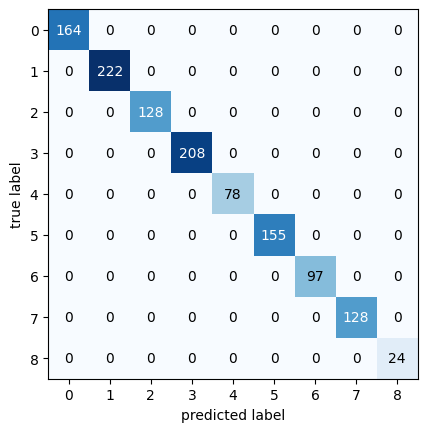

In [ ]:
# Prediksi pada data uji
y_pred = svm_cluster.predict(x_test_scaled)

# Probabilitas untuk multi-class klasifikasi
ypred_prob = svm_cluster.predict_proba(x_test_scaled)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'micro')
recall = recall_score(y_test, y_pred, average = 'micro')
f1_svm = f1_score(y_test, y_pred, average = 'micro')
roc_auc = roc_auc_score(y_test, ypred_prob, multi_class='ovr')

# Menampilka hasil metrik evaluasi
print("Accuracy = {}".format(accuracy))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1-Score = {}".format(f1_svm))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(confusion_matrix(y_test , y_pred))

#Save Model Klasifikasi

Pada tahap ini, setelah kami memilih model terbaik dan melatihnya, serta melakukan preprocessing data, kami akan menyimpan model dan preprocessing scaler ke dalam file terpisah. Hal ini penting untuk memungkinkan penggunaan model yang telah dilatih dan scaler yang telah disesuaikan pada tahap deployment.

In [ ]:
# Inisialisasi model SVM terbaik dengan parameter yang tepat
best_model_cusseg = SVC(C=1000, gamma=1)

# Melatih model terbaik pada data pelatihan yang telah discaling
best_model_cusseg.fit(x_train_scaled, y_train)

# Gunakan model untuk prediksi cluster
customer_segmentation = best_model_cusseg.predict(x_test_scaled)

#Save Model
Model yang telah dilatih dan scaler akan disimpan dalam format file pickle (.pkl) sehingga dapat digunakan kembali dengan mudah saat kita membangun antarmuka pengguna dengan Streamlit. Selain itu, ini juga memungkinkan untuk menghindari pelatihan ulang model dan preprocessing ketika kita ingin melakukan prediksi pada data baru di lingkungan produksi.

Dengan menyimpan model dan preprocessing scaler, kita dapat memuatnya kembali dalam aplikasi Streamlit dan menggunakan model tersebut untuk melakukan prediksi terhadap data pelanggan yang baru dimasukkan oleh pengguna. Ini akan mempermudah proses deployment dan menjadikan aplikasi lebih efisien.

In [ ]:
import pickle

# Simpan scaler ke dalam file 'scaler_ds.pkl'
with open('scaler_cusseg.pkl', 'wb') as scaler_file:
    pickle.dump(MN, scaler_file)

# Simpan model terbaik ke dalam file 'model_ds.pkl'
with open('model_cusseg.pkl', 'wb') as model_file:
    pickle.dump(best_model_cusseg, model_file)

#Testing
Tahap terakhir dari proses ini adalah pengujian. Dalam tahap ini, kami akan menguji model customer segmentation yang telah dilatih menggunakan data uji yang belum pernah dilihat sebelumnya. Pengujian ini bertujuan untuk mengevaluasi sejauh mana model dapat melakukan prediksi dengan baik pada data yang belum pernah dilihat sebelumnya. Hasil pengujian ini akan memberikan kita pemahaman tentang seberapa baik model ini dapat digunakan dalam situasi dunia nyata.

In [ ]:
import numpy as np
import pickle

# Input fitur-fitur
OrderCount = 4
CouponUsed = 2
HourSpendOnApp = 3



# Data dalam bentuk list
data = [
    [
        OrderCount,
        CouponUsed,
        HourSpendOnApp
    ]
]

# Load model dan skaler yang telah disimpan sebelumnya
MN = pickle.load(open('scaler_cusseg.pkl', 'rb'))
best_model_classification = pickle.load(open('model_cusseg.pkl', 'rb'))

# Standardisasi data
data_scaled = MN.transform(data)

# Prediksi hasil Status
hasil_customer_segmentation = best_model_cusseg.predict(data_scaled)
hasil_customer_segmentation = int(hasil_customer_segmentation)

# Mapping hasil prediksi ke label yang sesuai
if hasil_customer_segmentation == 0:
  status = "Customer masuk di dalam cluster ke-0"
  penjelasan = "Cluster ke-0 adalah kelompok customer yang paling sedikit bertransaksi. Walaupun telah menghabiskan cukup banyak waktu browsing di aplikasi, \nkupon yang digunakan juga sangat sedikit. (Customer yang sangat pemilih dan sering membandingkan kualitas dan harga. \nTermasuk hanya bertransaksi barang-barang yang diperlukan saja walaupun tidak sedang ada kupon)"
elif hasil_customer_segmentation == 1:
  status = "Customer masuk di dalam cluster ke-1"
  penjelasan = "Cluster ke-1 adalah kelompok customer yang sangat sering bertransaksi dan juga sangat sering menggunakan kupon. \nSelain itu, customer pun sering menghabiskan waktu untuk browsing aplikasi. \n(Customer yang mudah tergiur dengan adanya kupon yang sebisa mungkin diusahakan untuk digunakan)"
elif hasil_customer_segmentation == 2:
  status = "Customer masuk di dalam cluster ke-2"
  penjelasan = "Cluster ke-2 adalah kelompok customer yang bertransaksi cukup moderat dan juga sering menggunakan kupon, serta menghabiskan cukup banyak waktu. \nKemungkinan besar, setiap transaksi selalu menggunakan kupon. (Customer yang juga mudah tergiur dengan kupon, \nnamun setelah berpikir cukup panjang, tidak jadi bertransaksi)"
elif hasil_customer_segmentation == 3:
  status = "Customer masuk di dalam cluster ke-3"
  penjelasan = "Cluster ke-3 adalah kelompok customer yang paling sedikit bertansaksi, tidak pernah menggunakan kupon, dan menghabiskan sangat sedikit waktu \nuntuk browsing aplikasi. (Customer yang benar-benar hanya membuka aplikasi dan bertransaksi sesuai kebutuhan saja dan \nmungkin tidak tahu bagaimana cara menggunakan kupon atau tidak pernah eligible untuk mendapatkan kupon)"
elif hasil_customer_segmentation == 4:
  status = "Customer masuk di dalam cluster ke-4"
  penjelasan = "Cluster ke-4 adalah kelompok customer yang bertransaksi cukup moderat dan sangat sedikit menghabiskan \nwaktu untuk browsing di aplikasi. Namun, 50% transaksi selalu menggunakan kupon. \n(Customer yang selalu sudah memiliki rencana untuk membeli barang apa dan sangat sering mendapatkan kupon yang dapat dipakai)"
elif hasil_customer_segmentation == 5:
  status = "Customer masuk di dalam cluster ke-5"
  penjelasan = "Cluster ke-5 adalah kelompok customer yang bertransaksi cukup moderat dan selalu menggunakan kupon saat bertransaksi, \nnamun menghabiskan waktu paling lama browsing aplikasi. (Customer yang cukup mudah tergiur dengan kupon dan berusaha mencari barang-barang \ndengan value terbaik, namun sering pada akhirnya hanya cuci mata saja)"
elif hasil_customer_segmentation == 6:
  status = "Customer masuk di dalam cluster ke-6"
  penjelasan = "Cluster ke-6 adalah kelompok customer yang bertransaksi cukup moderat dan jarang menggunakan kupon, walaupun juga \nmenghabiskan waktu cukup lama browsing aplikasi. (Customer yang memiliki keinginan untuk membeli suatu barang spesifik \ndan melakukan riset panjang untuk menentukan keputusan baik dengan/tanpa kupon)"
elif hasil_customer_segmentation == 7:
  status = "Customer masuk di dalam cluster ke-7"
  penjelasan = "Cluster ke-7 adalah kelompok customer yang bertransaksi paling banyak dan menghabiskan banyak kupon juga. \nNamun, tidak terlalu lama browsing di aplikasi. (Customer yang sangat mudah tergiur dengan iklan/live streaming/harbolnas \nsehingga sering mendapatkan kupon. Namun, tidak terlalu sering membanding-bandingkan harga)"
elif hasil_customer_segmentation == 8:
  status = "Customer masuk di dalam cluster ke-8"
  penjelasan = "Cluster ke-8 adalah kelompok customer yang bertransaksi sangat sedikit dan menghabiskan sedikit waktu untuk browsing aplikasi. \nNamun, dapat dipastikan selalu menggunakan kupon. (Customer sudah memiliki barang spesifik yang ingin dibeli, \nnamun menunggu ada kupon untuk bertransaksi, tidak terlalu lama membanding-bandingkan harga lagi)"


# Menampilkan hasil prediksi
print(f"Hasil Customer Segmentation Status: {status}")
print(f"Penjelasan Status: {penjelasan}")

Hasil Customer Segmentation Status: Customer masuk di dalam cluster ke-4
Penjelasan Status: Cluster ke-4 adalah kelompok customer yang bertransaksi cukup moderat dan sangat sedikit menghabiskan 
waktu untuk browsing di aplikasi. Namun, 50% transaksi selalu menggunakan kupon. 
(Customer yang selalu sudah memiliki rencana untuk membeli barang apa dan sangat sering mendapatkan kupon yang dapat dipakai)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
